In [3]:
import os
os.chdir(r"C:\Users\Roozbeh\Sumo\WDC_FewerEdgesMap\All cameras in data 106\EQ_8_9")

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as st

**First we analyze the trip info output, all csv files are stored in h5 stores for compression and fast retrieval**

In [5]:
store = pd.HDFStore("wdc_measurement.h5")

In [6]:
trip_file_name = "tripinfo_010.csv"
queue_file_name = "cologne_queue.out.csv"
egdeinfo_file_name = "dump_60_60.csv"

In [7]:
if "trip_df" in store:
    tdf = store["trip_df"]
else:
    tdf = pd.read_csv(trip_file_name,sep=';')
    store["trip_df"] = tdf

In [8]:
tdf[:5]

,tripinfo_arrival,tripinfo_arrivalLane,tripinfo_arrivalPos,tripinfo_arrivalSpeed,tripinfo_depart,tripinfo_departDelay,tripinfo_departLane,tripinfo_departPos,tripinfo_departSpeed,tripinfo_devices,tripinfo_duration,tripinfo_id,tripinfo_rerouteNo,tripinfo_routeLength,tripinfo_speedFactor,tripinfo_timeLoss,tripinfo_vType,tripinfo_vaporized,tripinfo_waitSteps
0,101.0,130772958#0_0,3.65,23.33,44.0,-0.99,130772891#5_0,5.10,27.78,tripinfo_1397,57.0,1397,0,503.71,1.0,38.16,DEFAULT_VEHTYPE,NaN,19
1,104.0,130772958#0_1,3.65,9.97,70.0,-0.72,442466939_0,2.47,0.00,tripinfo_593,34.0,593,0,114.80,1.0,29.00,DEFAULT_VEHTYPE,NaN,4
2,107.0,130772958#1_1,181.57,27.63,74.0,0.02,130599646_0,5.10,27.57,tripinfo_583,33.0,583,0,287.10,1.0,21.45,DEFAULT_VEHTYPE,NaN,9
3,108.0,130772958#1_1,181.57,26.54,76.0,-0.76,130599646_0,5.10,25.25,tripinfo_547,32.0,547,0,287.10,1.0,20.91,DEFAULT_VEHTYPE,NaN,6
4,109.0,6056046_2,58.50,16.47,54.0,-0.47,286298162#0_0,5.10,16.90,tripinfo_539,55.0,539,0,219.95,1.0,46.72,DEFAULT_VEHTYPE,NaN,30


In [9]:
len(tdf)

12022

Let's get trips completed in each half hour

In [10]:
ax1 = tdf.ix[tdf["tripinfo_arrival"] <= 21600+7205,"tripinfo_arrival"].hist(bins=[1800*i for i in range(14)],alpha=0.8,edgecolor='k')
ax1.set_title("Trips Completed in each 30 Minutes")
ax1.set_xlabel("Time (Seconds)",fontsize=16)
ax1.set_ylabel("No. of Completed Trips",fontsize=16)
ax1.grid()
ax1.yaxis.grid(True)

C:\Users\Roozbeh\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate_ix
  """Entry point for launching an IPython kernel.


In [11]:
plt.savefig("hist_trip_completion.pdf",bbox_inches="tight")

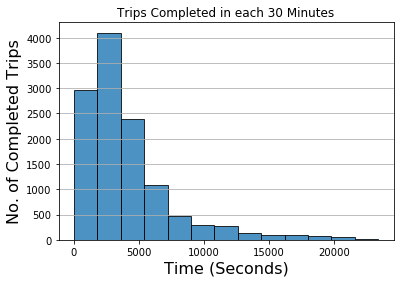

In [12]:
plt.show()

Now let's get distribution of trip duration and add a lognormal to it!

In [13]:
s,loc,scale = st.lognorm.fit(tdf["tripinfo_duration"],loc=0)

In [14]:
s,loc,scale

(1.071389085864912, -8.051669588678191, 1141.4439881608805)

In [15]:
#norm1,norm2 = st.norm.fit(tdf["tripinfo_duration"])

In [16]:
#gamma1, gamma2, gamma3 = st.gamma.fit(tdf["tripinfo_duration"])

In [17]:
#beta1, beta2,beta3,beta4 = st.beta.fit(tdf["tripinfo_duration"])

In [18]:
#expon1, expon2  = st.expon.fit(tdf["tripinfo_duration"])

In [19]:
fig = plt.figure()
ax2 = fig.add_subplot(111)
x = np.linspace(0,8000,8000)
ax2.hist(tdf["tripinfo_duration"],bins=20,normed=True,alpha=0.8)
ln = (st.lognorm.pdf(x,s,loc,scale))
#nr = st.norm.pdf(x,norm1,norm2)
#gm = st.gamma.pdf(x,gamma1,gamma2,gamma3)
#bt = st.beta.pdf(x,beta1,beta2,beta3,beta4)
#print [round(x,3) for x in ln[:10]]
ax2.plot(ln,color="r")
#ax.plot(nr,color="y")
#ax.plot(gm,color="g")
#ax.plot(bt,color="m")
ax2.set_xlabel("Trip Duration (Seconds)",fontsize=16)
ax2.set_ylabel("Probability",fontsize=16)
ax2.set_title("Fit of Lognormal Distribution")

In [20]:
plt.savefig("lognorm_fit_cologne_2h.pdf",bbox_inches = "tight")

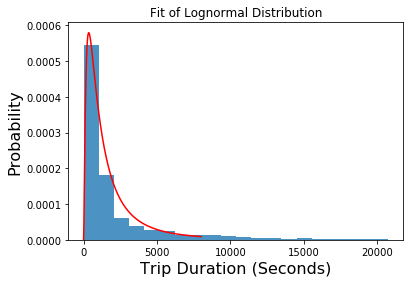

In [21]:
plt.show()

In [22]:
def cdf_plot(ser,ax=None,figsize=None, label=None):
    ser = ser.sort_values()
    cum_dist = np.linspace(0.,1.,len(ser))
    ser_cdf = pd.Series(cum_dist, index=ser)
    return ser_cdf.plot(drawstyle='steps',figsize=figsize,yticks=np.arange(0.,1.001,0.1),ax=ax, label=label)

In [23]:
cdf_plot(tdf["tripinfo_duration"],label="cdf of trips")

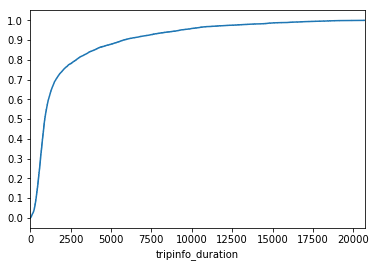

In [24]:
plt.show()

In [25]:
tdf["tripinfo_duration"].to_csv("tripduration89.csv")

**Now let's check on queue outputs**

In [43]:
if "queue_df" in store:
    qdf = store["queue_df"]
else:
    qdf = pd.read_csv(queue_file_name,sep=';')
    qdf = qdf.dropna()
    store["queue_df"] = qdf

In [44]:
qdf[qdf.columns[2:]].describe()

,lane_queueing_length,lane_queueing_length_experimental,lane_queueing_time
count,6.067544e+06,6.067544e+06,6.067544e+06
mean,2.084294e+01,2.204877e+01,2.424936e+01
std,4.308923e+01,4.031691e+01,3.812075e+01
min,0.000000e+00,0.000000e+00,0.000000e+00
25%,5.500000e+00,5.500000e+00,6.000000e+00
50%,5.510000e+00,1.200000e+01,1.500000e+01
75%,1.850000e+01,2.078000e+01,2.900000e+01
max,1.028320e+03,7.914300e+02,7.820000e+02


In [45]:
qdf[:3]

,data_timestep,lane_id,lane_queueing_length,lane_queueing_length_experimental,lane_queueing_time
17,21617.0,6187383#2_1,5.51,5.51,1.0
18,21618.0,132545224#4_1,5.51,5.51,1.0
19,21618.0,6187383#2_1,5.50,5.50,2.0


In [46]:
qdf = qdf[~ qdf["lane_id"].str.contains(":")]

In [47]:
qdf = qdf[qdf["data_timestep"] < 21600+7205]

In [48]:
lane_mean_qdf = qdf[qdf.columns[1:]].groupby("lane_id").mean()

In [49]:
lane_mean_qdf[:3]

,lane_queueing_length,lane_queueing_length_experimental,lane_queueing_time
lane_id,,,
-10070371#11_0,2.300000,4.61500,0.500000
-10070371#2_0,4.646321,5.84783,7.301887
-10070371#4_0,0.000000,4.74500,0.000000


In [23]:
#import seaborn as sns

In [24]:
#jp = sns.jointplot(x="data_timestep", y="lane_queueing_length", data=qdf, kind="kde", color="m")

In [26]:
#sns.reset_orig()

In [63]:
ax3 = cdf_plot(lane_mean_qdf["lane_queueing_length"])

In [64]:
ax3.set_xlim(0,50)
ax3.set_ylim(0,1)
ax3.set_xlabel("Queue Length (Meters)",fontsize=16)
ax3.set_ylabel("CDF",fontsize=16)
ax3.set_title("CDF of Average Queue Length")
ax3.grid()

In [66]:
plt.savefig("cdf_avg_queue_len.pdf",bbox_inches="tight")

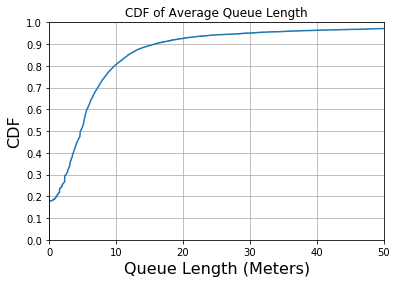

In [67]:
plt.show()

In [59]:
ax4 = cdf_plot(lane_mean_qdf["lane_queueing_time"])

In [60]:
ax4.set_xlim(0,50)
ax4.set_ylim(0,1)
ax4.set_xlabel("Queue Time (Seconds)",fontsize=16)
ax4.set_ylabel("CDF",fontsize=16)
ax4.set_title("CDF of Average Queue Time")
ax4.grid()

In [61]:
plt.savefig("cdf_avg_queue_time.pdf",bbox_inches="tight")

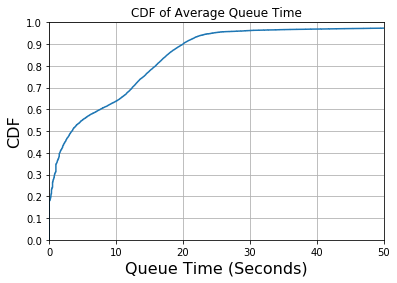

In [62]:
plt.show()

(NOT DOING IT NOW) We can also get the best fit results for distribution of length of the queue.

In [35]:
def analyze_best_fit(lane_groups):
    distributions = [st.expon, st.norm,st.gamma,st.weibull_max,st.weibull_min,st.logistic,st.beta]
    def get_best_fits(data):
        mles = []
        for distribution in distributions:
            pars = distribution.fit(data)
            mle = distribution.nnlf(pars, data)
            mles.append(mle)
        temp = sorted(zip(distributions, mles), key=lambda d: d[1])
        return [name ,temp[0][0].name,temp[1][0].name,temp[2][0].name,temp[3][0].name,temp[4][0].name]

    best_fits = []
    for name,group in lane_groups:
        best_fits.append(get_best_fits(group["lane_queueing_length"]))
    return best_fits

** Now let's have a look at egde info output dump**


http://sumo.dlr.de/wiki/Simulation/Output/Lane-_or_Edge-based_Traffic_Measures

In [69]:
if "edge_df" in store:
    edf = store["edge_df"]
else:
    edf = pd.read_csv(egdeinfo_file_name,sep=';')
    edf = edf.dropna()
    store["edge_df"] = edf

In [70]:
edf[:5]

,interval_begin,interval_end,interval_id,edge_arrived,edge_density,edge_departed,edge_entered,edge_id,edge_laneChangedFrom,edge_laneChangedTo,edge_left,edge_occupancy,edge_overlapTraveltime,edge_sampledSeconds,edge_speed,edge_traveltime,edge_waitingTime
0,21600.0,21660.0,dump_60_60,0,2.10,0,1,-118423453#0,0,0,1,0.95,9.00,9.00,8.43,8.32,0.0
1,21600.0,21660.0,dump_60_60,0,2.34,0,1,-118427321,0,0,1,1.06,14.49,14.49,7.42,13.70,0.0
2,21600.0,21660.0,dump_60_60,0,1.02,0,1,-129381478#1,0,0,0,0.46,12.74,4.89,6.62,12.06,0.0
3,21600.0,21660.0,dump_60_60,0,1.62,0,1,-129381482#0,0,0,1,0.73,5.40,5.40,11.11,4.73,0.0
4,21600.0,21660.0,dump_60_60,0,1.50,0,1,-129381482#2,0,0,1,0.67,5.45,5.45,11.94,5.07,0.0


In [71]:
edf["edge_density"] = edf["edge_density"].astype(str).str.extract( "([0-9\.]+)" ).astype(np.float)

C:\Users\Roozbeh\Anaconda3\lib\site-packages\ipykernel\__main__.py:1: FutureWarning: currently extract(expand=None) means expand=False (return Index/Series/DataFrame) but in a future version of pandas this will be changed to expand=True (return DataFrame)
  if __name__ == '__main__':


In [72]:
#assuming 2meters for length of  car it doesn't make much sense to have more than 500 cars in a km!
edf = edf[edf["edge_density"] <= 500]

In [77]:
ax5 = cdf_plot(edf["edge_density"])

In [78]:
ax5.set_xlim((0,100))
ax5.set_ylim(0,1)
ax5.set_xlabel("Edge Density (Veh/KM)",fontsize=16)
ax5.set_ylabel("CDF",fontsize=16)
ax5.set_title("CDF of Overal Edge Densities")
ax5.grid()

In [79]:
plt.savefig("cdf_edge_density.pdf",bbox_inches="tight")

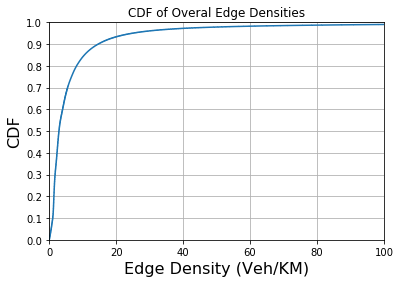

In [80]:
plt.show()

In [81]:
edf["edge_occupancy"] = edf["edge_occupancy"].astype(str).str.extract( "([0-9\.]+)" ,expand=False).astype(np.float)

In [87]:
ax6 = cdf_plot(edf["edge_occupancy"])

In [88]:
ax6.set_xlim((0,100))
ax6.set_ylim(0,1)
ax6.set_xlabel("Edge Occupancy (%)",fontsize=16)
ax6.set_ylabel("CDF",fontsize=16)
ax6.set_title("CDF of Overal Edge Occupancies")
ax6.grid()

In [89]:
plt.savefig("cdf_edge_occ.pdf",bbox_inches="tight")

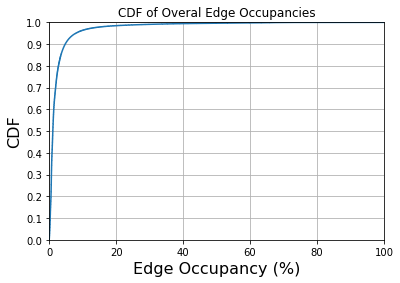

In [90]:
plt.show()

In [91]:
edf["entered_or_departed"] = edf["edge_entered"] + edf["edge_departed"]

In [92]:
ax7 = cdf_plot(edf["entered_or_departed"])

In [93]:
ax7.set_xlabel("No. of Vehicles in a Minute",fontsize=16)
ax7.set_ylabel("CDF",fontsize=16)
ax7.set_title("CDF of Overal per Minute Vehicles")
ax7.grid()

In [94]:
plt.savefig("cdf_overal_vehcount_per_minute.pdf",bbox_inches="tight")

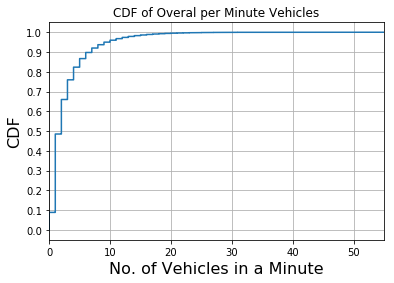

In [95]:
plt.show()

In [101]:
edf["car_count"] = edf["edge_entered"] + edf["edge_departed"] + edf["edge_laneChangedTo"]

In [102]:
edf.ix[(edf["car_count"]<40) & (edf["car_count"]!=0),"car_count"].hist(bins=20)

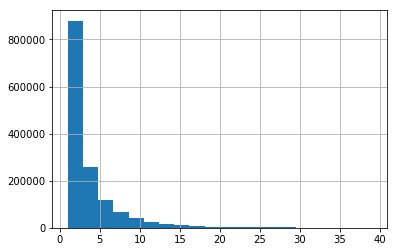

In [103]:
plt.show()

In [96]:
import seaborn as sns

In [97]:
sns.reset_orig()

In [112]:
#ax8 = sns.distplot(edf["entered_or_departed"],bins=32,kde_kws ={ "bw" : 0.95 , "color" : "red"})
ax8 = sns.distplot(edf["car_count"],bins=32,hist_kws={"alpha":0.8},
                   fit=st.expon,kde=False,fit_kws={"color":"red","label":"exponential fit"})

In [113]:
ax8.set_xlim(0,30)
ax8.set_xlabel("Number of cars",fontsize=16)
ax8.set_ylabel("Normed frequency",fontsize=16)
ax8.set_title("Density on all road segments per minute")

In [114]:
plt.savefig("density_total_car_count.pdf",bbox_inches="tight")

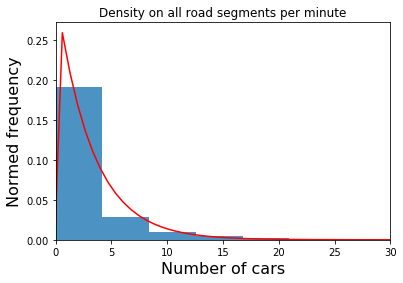

In [115]:
plt.show()